In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Raabta_dataset - donations.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Label,body
0,0,0,0,0,0,basicneeds,"I'm homeless, fleeing past abusers, and curren..."
1,1,1,1,1,1,loan,Hi I’m in deep trouble I’m about 90 miles away...
2,2,2,2,2,2,medical,[Charity Boxing Match](https://www.justgiving....
3,3,3,3,3,3,misc,paypal email : ollieboyles@gmail.com
4,4,4,4,4,4,misc,There are some truly serious things on this su...


In [4]:
df.shape

(372, 7)

In [6]:
df = df[['Label','body']]

In [7]:
df['Label'].unique()

array(['basicneeds', 'loan', 'medical', 'misc', 'bills', 'education',
       'pets'], dtype=object)

In [8]:
df.replace({'Label': {'Basic needs': 'basicneeds', 
                      'basic needs': 'basicneeds', 
                      'Basic needs/medical?': 'basicneeds',
                      'Basic Needs': 'basicneeds'}}, inplace = True)

/Users/junaid/.local/lib/python3.6/site-packages/pandas/core/generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


In [9]:
df.replace({'Label': {'loans': 'loan', 
                      'Loans': 'loan', 
                      'Loan': 'loan'}}, inplace = True)

In [10]:
df.replace({'Label': {'Misc': 'misc', 
                      'MIsc': 'misc'}}, inplace = True)

In [11]:
df.replace({'Label': {'Pets': 'pets', 
                      'Animals': 'pets'}}, inplace = True)

In [12]:
df.replace({'Label': {'Bills': 'bills'}}, inplace = True)

In [13]:
df.replace({'Label': {'Medical': 'medical'}}, inplace = True)

In [14]:
df.replace({'Label': {'Education': 'education'}}, inplace = True)

In [15]:
df.dropna(inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df.to_csv(r'Raabta_dataset - donations.csv')

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/junaid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

print(tf.__version__)

/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

1.13.1


In [65]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .5

In [66]:
articles = []
labels = []

with open("Raabta_dataset - donations.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[1])
        article = row[2]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print(len(labels))
print(len(articles))

372
372


In [67]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

186
186
186
186
186


In [68]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'i': 2,
 'help': 3,
 "i'm": 4,
 'https': 5,
 'get': 6,
 'paypal': 7,
 'would': 8,
 'me': 9,
 'money': 10}

In [69]:
train_sequences = tokenizer.texts_to_sequences(train_articles)
print(train_sequences[10])

[229, 159, 1067, 1727, 265, 617, 10, 3, 1068, 1728, 369, 116, 1729, 51, 370, 504, 1730, 1069, 169, 291, 371, 618, 215, 72, 799, 617, 220, 372, 245, 431, 202, 151, 373, 1731, 1732, 800, 505, 1733, 619, 620, 1734, 1735, 1070, 1736, 757, 1071, 59, 1072, 801, 802, 1737, 66, 17, 94, 432, 620, 12, 160, 1738, 66, 10, 1739, 432, 6, 803, 1740, 17, 313, 89, 2, 111, 3, 129, 1073, 169, 621, 33, 88, 620, 1741, 105, 65, 620, 1074, 73, 114, 50, 23, 5, 23, 1075, 203, 1076, 1077, 1078, 1079, 804, 1080, 1081, 5, 23, 1075, 203, 1076, 1077, 1078, 1079, 804, 1080, 1081]


In [70]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

61
200
45
200
110
200


In [71]:
print(train_padded[10])

[ 229  159 1067 1727  265  617   10    3 1068 1728  369  116 1729   51
  370  504 1730 1069  169  291  371  618  215   72  799  617  220  372
  245  431  202  151  373 1731 1732  800  505 1733  619  620 1734 1735
 1070 1736  757 1071   59 1072  801  802 1737   66   17   94  432  620
   12  160 1738   66   10 1739  432    6  803 1740   17  313   89    2
  111    3  129 1073  169  621   33   88  620 1741  105   65  620 1074
   73  114   50   23    5   23 1075  203 1076 1077 1078 1079  804 1080
 1081    5   23 1075  203 1076 1077 1078 1079  804 1080 1081    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [72]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

186
(186, 200)


In [73]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[2]
[7]
[4]
(186, 1)
[1]
[2]
[2]
(186, 1)


In [74]:
# reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# def decode_article(text):
#     return ' '.join([reverse_word_index.get(i, '?') for i in text])
# print(decode_article(train_padded[10]))
# print('---')
# print(train_articles[20])

### Design LSTM

In [75]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
#    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    # use ReLU in place of tanh function since they are very good alternatives of each other.
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    # Add a Dense layer with 6 units and softmax activation.
    # When we have multiple outputs, softmax convert outputs layers into a probability distribution.
    tf.keras.layers.Dense(8, activation='softmax')
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          320000    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_6 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 520       
Total params: 394,824
Trainable params: 394,824
Non-trainable params: 0
_________________________________________________________________


In [76]:
print(set(labels))

{'education', 'basicneeds', 'misc', 'pets', 'bills', 'medical', 'loan'}


In [77]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 50

In [78]:
history = model.fit(train_padded, training_label_seq, 
                    epochs=num_epochs, 
                    validation_data=(validation_padded, validation_label_seq), verbose=2)

Train on 186 samples, validate on 186 samples
Epoch 1/50
 - 3s - loss: 2.0604 - acc: 0.3118 - val_loss: 2.0279 - val_acc: 0.4247
Epoch 2/50
 - 1s - loss: 1.9802 - acc: 0.3763 - val_loss: 1.9194 - val_acc: 0.4247
Epoch 3/50
 - 2s - loss: 1.7907 - acc: 0.3763 - val_loss: 1.8758 - val_acc: 0.4247
Epoch 4/50
 - 2s - loss: 1.6857 - acc: 0.3763 - val_loss: 1.7924 - val_acc: 0.4247
Epoch 5/50
 - 2s - loss: 1.6515 - acc: 0.4140 - val_loss: 1.7893 - val_acc: 0.4247
Epoch 6/50
 - 2s - loss: 1.6056 - acc: 0.3978 - val_loss: 1.7531 - val_acc: 0.4247
Epoch 7/50
 - 2s - loss: 1.5490 - acc: 0.3763 - val_loss: 1.7319 - val_acc: 0.4247
Epoch 8/50
 - 2s - loss: 1.4695 - acc: 0.3763 - val_loss: 1.6827 - val_acc: 0.4247
Epoch 9/50
 - 2s - loss: 1.3180 - acc: 0.3817 - val_loss: 1.7462 - val_acc: 0.4247
Epoch 10/50
 - 2s - loss: 1.1337 - acc: 0.5430 - val_loss: 1.7564 - val_acc: 0.3817
Epoch 11/50
 - 2s - loss: 0.9201 - acc: 0.7043 - val_loss: 1.8684 - val_acc: 0.2043
Epoch 12/50
 - 2s - loss: 0.8495 - acc:

In [79]:
def plot_graphs(history, string):
    
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

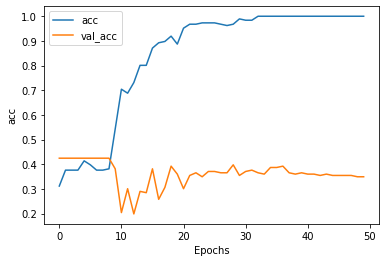

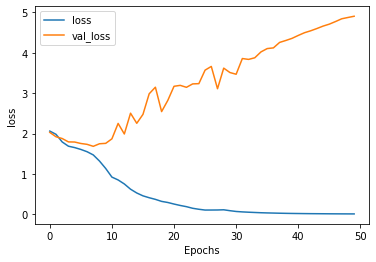

In [80]:
plot_graphs(history, 'acc')
plot_graphs(history, "loss")